In [1]:
#!pip install tensorflow==2.7.0

In [2]:
import tensorflow as tf
tf.__version__

2023-01-25 17:14:57.015258: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


'2.9.1'

In [3]:
#device_name = tf.test.gpu_device_name()
#if device_name != '/device:GPU:0':
#  raise SystemError('GPU device not found')
#print('Found GPU at: {}'.format(device_name))

In [4]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [5]:
from tensorflow import keras

In [6]:
from tensorflow.keras.preprocessing.image import load_img

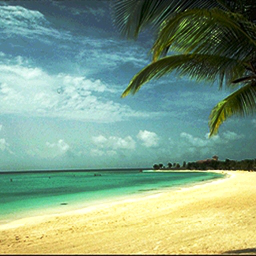

In [8]:
# test loading an image
data_dir_path = "data/"
test_coast_dir_path = data_dir_path + "test/coast/"
file_path = test_coast_dir_path + "b_beach_coast_bea10.jpg"

load_img(file_path)

In [9]:
img = load_img(file_path)
x = np.array(img)
x.shape

(256, 256, 3)

## Train MobileNet for scene classification of 3 types of scenery: coast, forest, mountain

In [10]:
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.applications.mobilenet import decode_predictions

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [11]:
# specify the paths to the data directories
train_dir = "data/train"
val_dir = "data/validation"
test_dir = "data/test"

In [12]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_ds = train_gen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32
)

Found 928 images belonging to 3 classes.


In [13]:
train_ds.class_indices

{'coast': 0, 'forest': 1, 'mountain': 2}

In [14]:
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    shuffle=False
)

Found 115 images belonging to 3 classes.


In [15]:
base_model = MobileNet(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3)
)

base_model.trainable = False

inputs = keras.Input(shape=(224, 224, 3))

base = base_model(inputs, training=False)

vectors = keras.layers.GlobalAveragePooling2D()(base)

outputs = keras.layers.Dense(3)(vectors)

model = keras.Model(inputs, outputs)

2023-01-25 17:23:05.377647: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-25 17:23:05.384399: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-25 17:23:05.385040: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-25 17:23:05.385960: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the approp

17225924/17225924 [==============================] - 0s 0us/step


In [16]:
# Set the learning rate to 0.01 and use Adam optimizer
learning_rate = 0.01
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

loss = keras.losses.CategoricalCrossentropy(from_logits=True)

model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [17]:
# Train for 10 epochs
history = model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10


2023-01-25 17:24:14.166529: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100
2023-01-25 17:24:14.794288: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-01-25 17:24:14.795180: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-01-25 17:24:14.795216: W tensorflow/stream_executor/gpu/asm_compiler.cc:80] Couldn't get ptxas version string: INTERNAL: Couldn't invoke ptxas --version
2023-01-25 17:24:14.796170: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-01-25 17:24:14.796260: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] INTERNAL: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


29/29 [==============================] - 7s 137ms/step - loss: 0.3096 - accuracy: 0.8998 - val_loss: 0.0088 - val_accuracy: 1.0000
Epoch 2/10
29/29 [==============================] - 3s 111ms/step - loss: 0.0394 - accuracy: 0.9860 - val_loss: 0.0257 - val_accuracy: 0.9913
Epoch 3/10
29/29 [==============================] - 3s 111ms/step - loss: 0.0092 - accuracy: 0.9968 - val_loss: 0.0210 - val_accuracy: 0.9913
Epoch 4/10
29/29 [==============================] - 3s 110ms/step - loss: 0.0046 - accuracy: 1.0000 - val_loss: 0.0365 - val_accuracy: 0.9913
Epoch 5/10
29/29 [==============================] - 3s 109ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.0306 - val_accuracy: 0.9913
Epoch 6/10
29/29 [==============================] - 3s 112ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.0342 - val_accuracy: 0.9913
Epoch 7/10
29/29 [==============================] - 3s 109ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0271 - val_accuracy: 0.9913
Epoch 8/10
29/29 

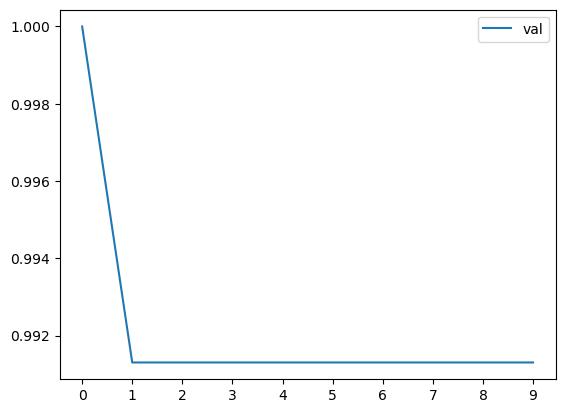

In [18]:
plt.plot(history.history['val_accuracy'], label='val')
plt.xticks(np.arange(10))
plt.legend()

We see that the validation accuracy is very high at nearly 100% for almost all epochs.  There is risk of overfitting.  For now, we will experiment with different learning rates to hopefully find a rate that gives a good tradeoff between accuracy and training speed.

## Tuning the Learning Rate  

We will experiment with several higher values of learning rate to find an optimal rate.

In [19]:
# Function to create model

def make_model(learning_rate=0.01):
    base_model = MobileNet(weights='imagenet',
                          include_top=False,
                          input_shape=(224,224,3))

    base_model.trainable = False
    
    #########################################
    
    inputs = keras.Input(shape=(224,224, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    outputs = keras.layers.Dense(3)(vectors)
    model = keras.Model(inputs, outputs)
    
    #########################################
    
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    # Compile the model
    model.compile(optimizer=optimizer,
                  loss=loss,
                  metrics=['accuracy'])
    
    return model

In [20]:
scores = {}

for lr in [0.0001, 0.001, 0.01, 0.1]:
    print(lr)

    model = make_model(learning_rate=lr)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[lr] = history.history

    print()
    print()

0.0001
Epoch 1/10
29/29 [==============================] - 5s 129ms/step - loss: 1.3433 - accuracy: 0.3481 - val_loss: 1.0898 - val_accuracy: 0.4435
Epoch 2/10
29/29 [==============================] - 3s 111ms/step - loss: 1.0150 - accuracy: 0.4978 - val_loss: 0.8301 - val_accuracy: 0.6174
Epoch 3/10
29/29 [==============================] - 3s 109ms/step - loss: 0.7881 - accuracy: 0.6595 - val_loss: 0.6450 - val_accuracy: 0.7652
Epoch 4/10
29/29 [==============================] - 3s 109ms/step - loss: 0.6249 - accuracy: 0.7716 - val_loss: 0.5117 - val_accuracy: 0.8522
Epoch 5/10
29/29 [==============================] - 3s 108ms/step - loss: 0.5085 - accuracy: 0.8556 - val_loss: 0.4172 - val_accuracy: 0.9130
Epoch 6/10
29/29 [==============================] - 3s 108ms/step - loss: 0.4254 - accuracy: 0.9019 - val_loss: 0.3483 - val_accuracy: 0.9565
Epoch 7/10
29/29 [==============================] - 3s 109ms/step - loss: 0.3643 - accuracy: 0.9213 - val_loss: 0.2961 - val_accuracy: 0.9739

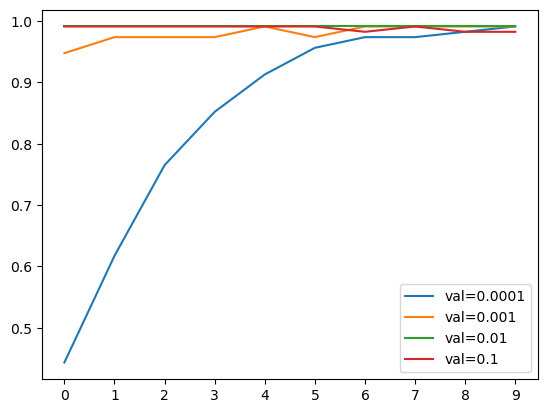

In [21]:
for lr, hist in scores.items():
    #plt.plot(hist['accuracy'], label=('train=%s' % lr))
    plt.plot(hist['val_accuracy'], label=('val=%s' % lr))

plt.xticks(np.arange(10))
plt.legend()

Comparing the above validation accuracy graphs across epochs, we see that learning rate of 0.0001 is much too slow, and 0.001 is much faster but still slower than 0.01 and 0.1. So it appears to be a toss-up between 0.01 and 0.1.  The curve for 0.1 shows some instability from epoch 5.  We will settle with learning rate of 0.01.

## Data Augmentation

Even though the model shows good validation accuracy at early epochs for learning rate of 0.01, we want to experiment with data augmentation on the training set in order to build a more robust model and prevent overfitting.  The transformations which we think are applicable for scene images are rotation [-30,30] degrees, horizontal translation (10%), vertical transltion (10%), zooming-in/out [0.9, 1.1] and flip (about a vertical axis).

In [22]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range = 30,
    width_shift_range = 10.0,
    height_shift_range=10.0,
    zoom_range=0.1,
    vertical_flip=True
)

train_ds = train_gen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32
)

val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    shuffle=False
)

Found 928 images belonging to 3 classes.
Found 115 images belonging to 3 classes.


In [23]:
learning_rate = 0.01

model = make_model( learning_rate=learning_rate)

history = model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
29/29 [==============================] - 13s 409ms/step - loss: 0.7126 - accuracy: 0.7866 - val_loss: 0.0956 - val_accuracy: 0.9478
Epoch 2/10
29/29 [==============================] - 11s 375ms/step - loss: 0.1815 - accuracy: 0.9429 - val_loss: 0.0307 - val_accuracy: 1.0000
Epoch 3/10
29/29 [==============================] - 11s 379ms/step - loss: 0.1129 - accuracy: 0.9666 - val_loss: 0.0785 - val_accuracy: 0.9739
Epoch 4/10
29/29 [==============================] - 11s 378ms/step - loss: 0.1532 - accuracy: 0.9494 - val_loss: 0.0579 - val_accuracy: 0.9826
Epoch 5/10
29/29 [==============================] - 11s 377ms/step - loss: 0.1675 - accuracy: 0.9418 - val_loss: 0.0285 - val_accuracy: 0.9913
Epoch 6/10
29/29 [==============================] - 11s 376ms/step - loss: 0.0757 - accuracy: 0.9688 - val_loss: 0.0228 - val_accuracy: 0.9913
Epoch 7/10
29/29 [==============================] - 11s 382ms/step - loss: 0.0559 - accuracy: 0.9774 - val_loss: 0.0271 - val_accuracy: 0.9913

The validation accuracy peaked at 100% at epoch 2 and went up and down in the 0.9s for the rest of the epochs.  Perhaps this rate is too high.  Let us see how the other learning rates fare.

In [24]:
scores = {}

for lr in [0.001, 0.01, 0.1]:
    print(lr)

    model = make_model(learning_rate=lr)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[lr] = history.history

    print()
    print()

0.001
Epoch 1/10
29/29 [==============================] - 13s 390ms/step - loss: 0.6635 - accuracy: 0.7134 - val_loss: 0.2933 - val_accuracy: 0.9130
Epoch 2/10
29/29 [==============================] - 11s 377ms/step - loss: 0.2606 - accuracy: 0.9181 - val_loss: 0.1807 - val_accuracy: 0.9826
Epoch 3/10
29/29 [==============================] - 11s 377ms/step - loss: 0.2042 - accuracy: 0.9343 - val_loss: 0.1347 - val_accuracy: 0.9826
Epoch 4/10
29/29 [==============================] - 11s 379ms/step - loss: 0.1568 - accuracy: 0.9494 - val_loss: 0.1163 - val_accuracy: 0.9826
Epoch 5/10
29/29 [==============================] - 11s 380ms/step - loss: 0.1367 - accuracy: 0.9591 - val_loss: 0.0963 - val_accuracy: 0.9826
Epoch 6/10
29/29 [==============================] - 11s 377ms/step - loss: 0.1415 - accuracy: 0.9547 - val_loss: 0.0859 - val_accuracy: 0.9826
Epoch 7/10
29/29 [==============================] - 11s 380ms/step - loss: 0.1151 - accuracy: 0.9612 - val_loss: 0.0797 - val_accuracy: 

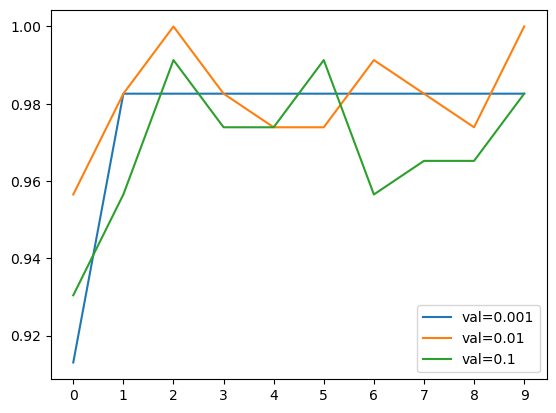

In [25]:
for lr, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % lr))

plt.xticks(np.arange(10))
plt.legend()

All 3 validation accuracy graphs peak/plateau at the early epoch (1 or 2).  Perhaps this consistency across learning rates is a good sign that the model only needs a few epochs of training for good results. Since the peak accuracy for learning rate 0.01 is highest among the three, we will stick with 0.01.  Next, we want to apply model checkpointing to store the weights of the "best" model.